#Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from warnings import filterwarnings

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Logistic Regression

##Model ve Tahmin

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.head()

In [ ]:
df.describe().T

In [ ]:
plt.boxplot(df.Pregnancies,vert=False);

In [ ]:
df.Outcome.value_counts()

In [ ]:
y = df.Outcome
x = df.drop(["Outcome"],axis=1)

In [ ]:
log_model = LogisticRegression(solver="liblinear").fit(x,y)

In [ ]:
log_model.intercept_

array([-5.88653539])

In [ ]:
log_model.coef_

array([[ 1.17098692e-01,  2.83673379e-02, -1.69010912e-02,
         7.40100722e-04, -6.42594633e-04,  5.96676293e-02,
         6.83738130e-01,  7.20115615e-03]])

In [ ]:
log_model.predict(x)[:5]

array([1, 0, 1, 0, 1])

In [ ]:
y_pred = log_model.predict(x)
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[448,  52],
       [120, 148]])

In [ ]:
accuracy_score(y,y_pred)

0.7760416666666666

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



Birinci sınıfın gerçekleşme olasılığı

In [ ]:
log_model.predict_proba(x)[:5]

array([[0.35045457, 0.64954543],
       [0.91696714, 0.08303286],
       [0.22444087, 0.77555913],
       [0.92140042, 0.07859958],
       [0.16584029, 0.83415971]])

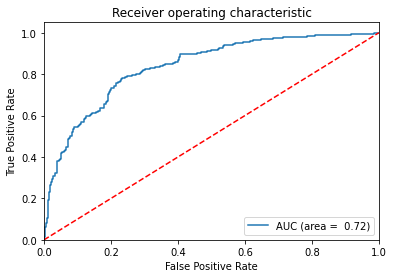

In [ ]:
logit_roc_auc = roc_auc_score(y,log_model.predict(x))
fpr,tpr,thresholds = roc_curve(y,log_model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area =  %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show();

##Tuning

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [ ]:
log_model =LogisticRegression(solver="liblinear").fit(x_train,y_train)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.7619047619047619


In [ ]:
cross_val_score(log_model,x_test,y_test,cv=10).mean()

0.7704710144927536

#KNN(K-Nearest Neigbours)

##Model ve Tahmin

In [ ]:
df = pd.read_csv("diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [ ]:
knn_model = KNeighborsClassifier().fit(x_train,y_train)

In [ ]:
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.6883116883116883

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



##Tuning

In [ ]:
knn_model = KNeighborsClassifier()

In [ ]:
knn_params = {"n_neighbors":np.arange(1,50)}

In [ ]:
knn_cv_model = GridSearchCV(knn_model,knn_params,cv=10).fit(x_train,y_train)

In [ ]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(x_train,y_train)

In [ ]:
y_pred = knn_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7316017316017316

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       151
           1       0.62      0.57      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.73      0.73      0.73       231



In [ ]:
knn_tuned.score(x_test,y_test)

0.7316017316017316

#SVC(Support Vector Classifier)

##Model ve Tahmin

In [ ]:
df = pd.read_csv("diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [ ]:
svm_model = SVC(kernel="linear").fit(x_train,y_train)

In [ ]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

##Tuning

In [ ]:
svm_params = {"C":np.arange(1,4),
              "kernel": ["linear","rbf"]}

In [ ]:
svm_model = SVC()

In [ ]:
svm_cv_model = GridSearchCV(svm_model,svm_params,verbose=2,n_jobs=-1,cv=5).fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   57.9s finished


In [ ]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [ ]:
svm_tuned = SVC(C=2,kernel="linear").fit(x_train,y_train)


In [ ]:
y_pred = svm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

#ANN(Artificial Neural Networks)
#MLP(MultiLayer Perceptron)

##Model ve Tahmin

In [ ]:
df = pd.read_csv("diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [ ]:
scaler = StandardScaler()


In [ ]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
scaler.fit(x_test)
x_test = scaler.transform(x_test)

In [ ]:
mlp_model = MLPClassifier().fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
mlp_model.coefs_

In [ ]:
?mlp_model

In [ ]:
y_pred = mlp_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

##Tuning

In [ ]:
mlp_params ={"alpha":[1,5,0.1,0.01,0.03,0.005,0.0001],
             "hidden_layer_sizes":[(10,10),(100,100,100),(100,100),(3,5)]}

In [ ]:
mlp_model= MLPClassifier(solver="lbfgs",activation="logistic")

In [ ]:
mlp_cv_model = GridSearchCV(mlp_model,mlp_params,cv=5,verbose=2,n_jobs=-1).fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.3min finished


In [ ]:
mlp_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (3, 5)}

In [ ]:
mlp_tuned = MLPClassifier(alpha=5,hidden_layer_sizes=(100,100),solver="lbfgs",activation="logistic").fit(x_train,y_train)

In [ ]:
y_pred = mlp_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7619047619047619

#CART(Classification and Regression Tree)

#Model ve Tahmin

In [ ]:
df = pd.read_csv("diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [ ]:
cart_model = DecisionTreeClassifier().fit(x_train,y_train)

In [ ]:
y_pred = cart_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7142857142857143

##Tuning

In [ ]:
cart_model = DecisionTreeClassifier()

In [ ]:
cart_params = {"max_depth" : [1,3,5,8,10],
               "min_samples_split":[2,3,5,10,20,50]}

In [ ]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv = 10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.3s finished


In [ ]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [ ]:
cart_tuned = DecisionTreeClassifier(max_depth=5,min_samples_split=20).fit(x_train,y_train)

In [ ]:
y_pred = cart_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

#Random Forests

##Model ve Tahmin

In [ ]:
df = pd.read_csv("diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [ ]:
rf_model = RandomForestClassifier().fit(x_train,y_train)

In [ ]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

##Tuning

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
rf_params = {"min_samples_split":[2,5,10,20],"max_features":[3,5,7],"n_estimators":[100,200,500,1000]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model,rf_params,cv=10,verbose=10,n_jobs=-1).fit(x_train,y_train)

In [ ]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 5, 'n_estimators': 500}

In [ ]:
rf_tuned = RandomForestClassifier(min_samples_split=5,
                                  max_features=3,
                                  n_estimators=500).fit(x_train,y_train)

In [ ]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7445887445887446

##Değişken Önem Düzeyleri

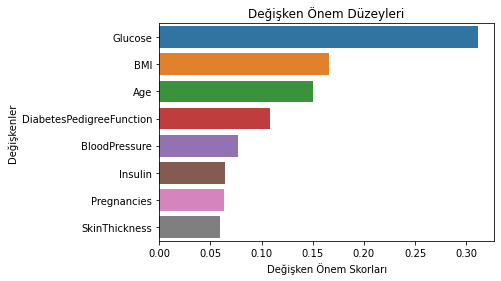

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()

#GBM(Gradient Boosting Machines)

##Model ve Tahmin

In [ ]:
df = pd.read_csv("diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [ ]:
gbm_model= GradientBoostingClassifier().fit(x_train,y_train)

In [ ]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

##Tuning

In [ ]:
gbm_model= GradientBoostingClassifier()

In [ ]:
gbm_params = {"learning_rate":[0.1,0.01,0.001,0.05],"max_depth":[2,3,5,8],"n_estimators":[100,300,500,1000]}

In [ ]:
gbm_cv_model = GridSearchCV(gbm_model,gbm_params,cv=10,verbose=2,n_jobs=-1,).fit(x_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  7.5min finished


In [ ]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [ ]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=500).fit(x_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7316017316017316

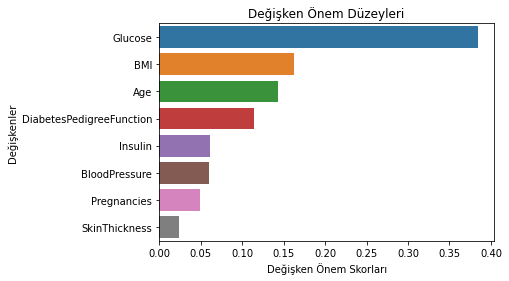

In [ ]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()

#XGBoost

##Model ve Tahmin

In [ ]:

from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier().fit(x_train,y_train)

In [ ]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7489177489177489

##Tuning

In [ ]:
xgb_model = XGBClassifier()

In [ ]:
xgb_params = {"n_estimators":[100,500,1000],
              "subsample":[0.6,0.8,1],
              "max_depth":[3,5,7],
              "learning_rate":[0.1,0.001,0.01]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb_model,xgb_params,cv=10,n_jobs=-1,verbose=5).fit(x_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.0min finished


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [ ]:
xgb_tuned =XGBClassifier(n_estimators=500,subsample=0.6,max_depth=7,learning_rate=0.001).fit(x_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7575757575757576

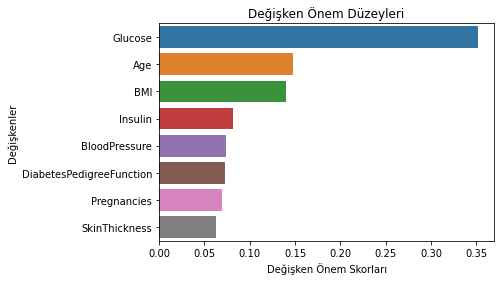

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()

#Light GBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_model = LGBMClassifier().fit(x_train,y_train)

In [ ]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred = lgbm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

##Tuning

In [ ]:
lgbm_model = LGBMClassifier()

In [ ]:
lgbm_params = {"learning_rate":[0.001,0.01,0.1],"n_estimators":[200,500,1000],
               "max_depth":[1,2,35,8]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm_model,lgbm_params,cv=10,verbose=5,n_jobs=-1).fit(x_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   41.4s finished


In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [ ]:
lgbm_tuned = LGBMClassifier(learning_rate=0.01,max_depth=1,n_estimators=500).fit(x_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(x_test)
accuracy_score(y_test,y_pred)

0.7575757575757576

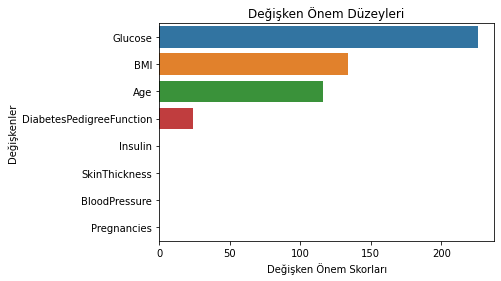

In [ ]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel("Değişken Önem Skorları")
plt.ylabel("Değişkenler")
plt.title("Değişken Önem Düzeyleri")
plt.show()

#CatBoost

##Model ve Tahmin

In [ ]:
!pip install catboost
df = pd.read_csv("diabetes.csv")
y = df.Outcome
x = df.drop(["Outcome"],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=42)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
catb_model = CatBoostClassifier().fit(x_train,y_train,verbose=False)

In [ ]:
catb_model

In [ ]:
y_pred = catb_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

##Tuning

In [ ]:
catb_model = CatBoostClassifier()

In [ ]:
catb_params = {"iterations":[200,500,1000],"learning_rate":[0.01,0.3,0.1],"max_depth":[4,5,8]}

In [ ]:
catb_cv_model = GridSearchCV(catb_model,catb_params,verbose=5,n_jobs=-1,cv=10).fit(x_train,y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  6.7min finished


0:	learn: 0.6863412	total: 5.92ms	remaining: 1.18s
1:	learn: 0.6811322	total: 10.3ms	remaining: 1.02s
2:	learn: 0.6753199	total: 14.1ms	remaining: 928ms
3:	learn: 0.6697717	total: 18.1ms	remaining: 885ms
4:	learn: 0.6642090	total: 22ms	remaining: 857ms
5:	learn: 0.6577038	total: 25.8ms	remaining: 833ms
6:	learn: 0.6522290	total: 29.6ms	remaining: 816ms
7:	learn: 0.6466015	total: 33.5ms	remaining: 804ms
8:	learn: 0.6408068	total: 37.3ms	remaining: 792ms
9:	learn: 0.6358218	total: 41.2ms	remaining: 782ms
10:	learn: 0.6300444	total: 44.9ms	remaining: 772ms
11:	learn: 0.6240992	total: 48.7ms	remaining: 763ms
12:	learn: 0.6196618	total: 52.5ms	remaining: 756ms
13:	learn: 0.6149237	total: 56.3ms	remaining: 748ms
14:	learn: 0.6093146	total: 60.1ms	remaining: 742ms
15:	learn: 0.6047282	total: 63.9ms	remaining: 735ms
16:	learn: 0.6013242	total: 67.9ms	remaining: 731ms
17:	learn: 0.5958624	total: 75.2ms	remaining: 760ms
18:	learn: 0.5903733	total: 80ms	remaining: 762ms
19:	learn: 0.5866505	total

In [ ]:
catb_cv_model.best_params_

{'iterations': 200, 'learning_rate': 0.01, 'max_depth': 8}

In [ ]:
catb_tuned = CatBoostClassifier(iterations=,learning_rate=,max_depth=).fit(x_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(x_test)
accuracy_score(y_test,y_pred)